In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
# Remove the common warnings due to deprecated options:
import warnings
warnings.simplefilter('ignore',FutureWarning)

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # For decision tree modeling.
from sklearn.ensemble import RandomForestClassifier # For random forest modeling.
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
df = pd.read_csv("LendingClub_loan_data_(2007-2010).csv")
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
# Quick scan to check for null values in the data set.
df.isnull().any().any()

False

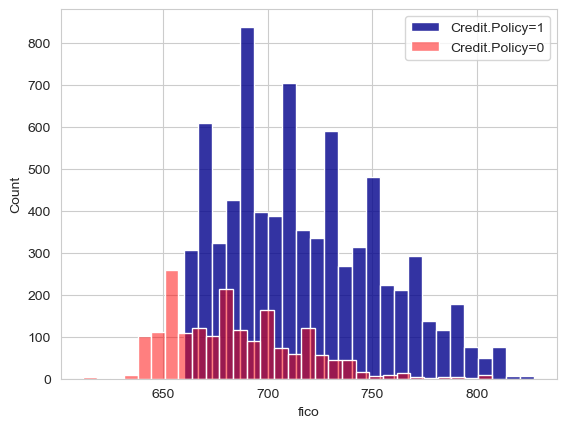

In [8]:
# Checking a few possible relationships to see if there's any noteworthy correlation:
# FICO credit score between the policies:
sns.histplot(x='fico',data=df[df['credit.policy']==1],bins=30,alpha=0.8,color='darkblue')
sns.histplot(x='fico',data=df[df['credit.policy']==0],bins=30,alpha=0.5,color='red')
plt.legend(labels=['Credit.Policy=1','Credit.Policy=0'])

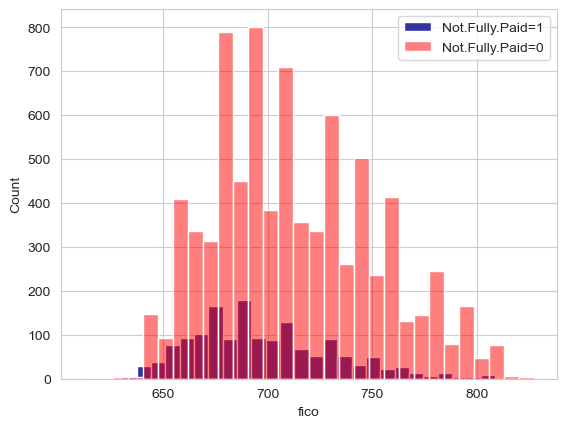

In [9]:
# FICO credit score vs pay status:
sns.histplot(x='fico',data=df[df['not.fully.paid']==1],bins=30,alpha=0.8,color='darkblue')
sns.histplot(x='fico',data=df[df['not.fully.paid']==0],bins=30,alpha=0.5,color='red')
plt.legend(labels=['Not.Fully.Paid=1','Not.Fully.Paid=0'])

<Axes: xlabel='purpose', ylabel='count'>

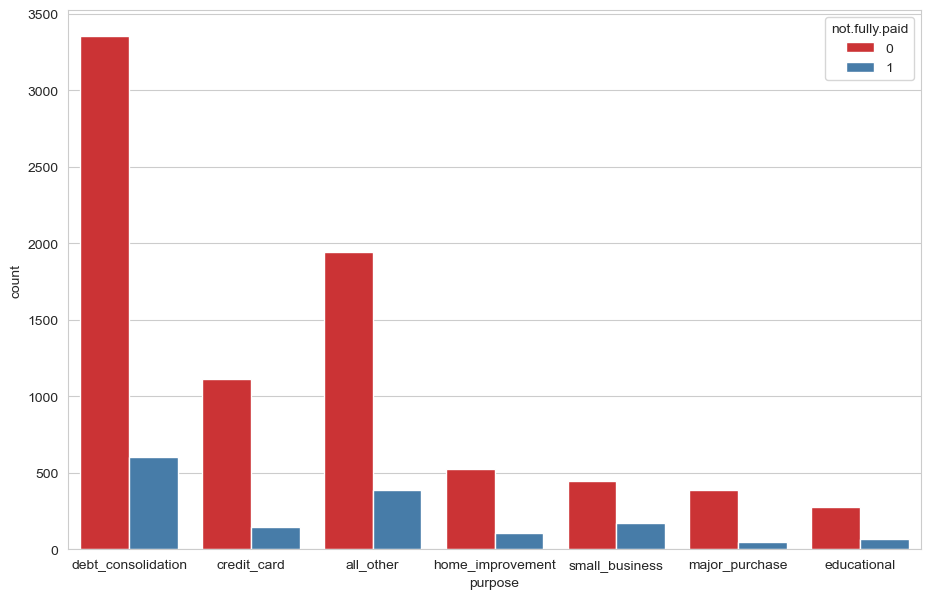

In [10]:
# Relationship between the purpose for the loans and pay status:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',data=df,hue=df['not.fully.paid'].astype(str),palette='Set1') # Using sting type as int results in error with version.

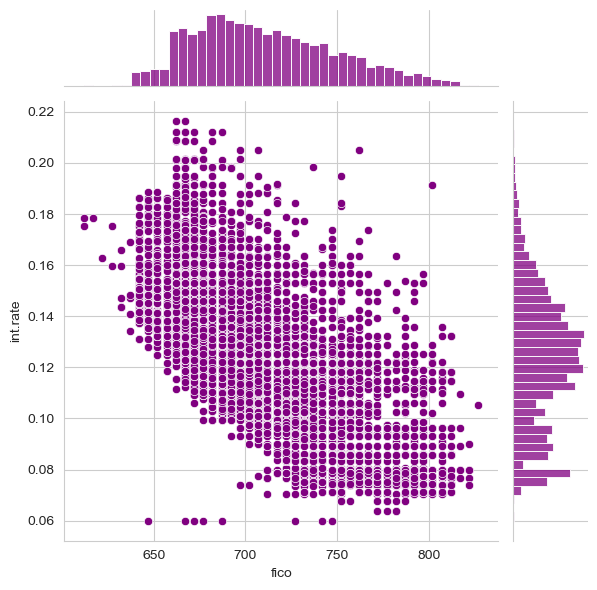

In [11]:
# Relationship between FICO credit score and interest rate:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

<Figure size 1000x700 with 0 Axes>

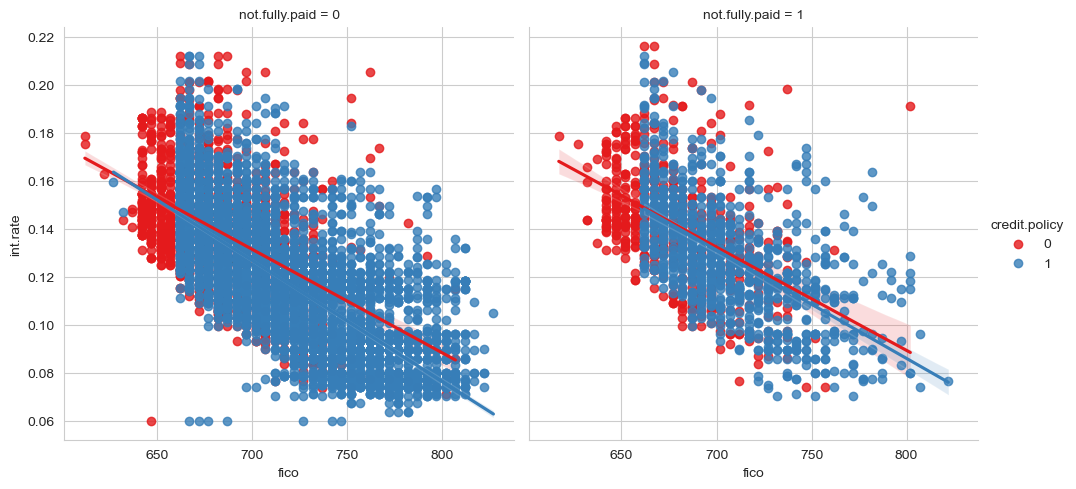

In [12]:
# Relationship between FICO credit score vs interest rate based on pay status:
plt.figure(figsize=(10,7))
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')

In [13]:
# Re-checking the information of the data frame before performing machine learning:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [14]:
# Replacing "purpose" column with columns that contain boolean values for the features:
cat_feats = ['purpose']
final_df = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [15]:
# Train/test split for machine learning:
X = final_df.drop('not.fully.paid',axis=1)
y = final_df['not.fully.paid']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
# Modeling to find probability of payments:
dtree = DecisionTreeClassifier()

In [17]:
# Train model:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [18]:
# Predict data based on the trained model:
predictions = dtree.predict(X_test)

In [19]:
# Check the confusion matrix and classification report:
print(f'Confusion matrix:\n\n{confusion_matrix(y_test,predictions)}\n')
print(f'Classification report:\n\n{classification_report(y_test,predictions)}')

Confusion matrix:

[[1987  444]
 [ 345   98]]

Classification report:

              precision    recall  f1-score   support

           0       0.85      0.82      0.83      2431
           1       0.18      0.22      0.20       443

    accuracy                           0.73      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.73      0.74      2874



In [20]:
# Modeling and training random forest:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [21]:
# Predict data based on the trained model:
rfpredictions = rfc.predict(X_test)

In [22]:
# Check the confusion matrix and classification report:
print(f'Confusion matrix:\n\n{confusion_matrix(y_test,rfpredictions)}\n')
print(f'Classification report:\n\n{classification_report(y_test,rfpredictions)}')

Confusion matrix:

[[2422    9]
 [ 434    9]]

Classification report:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.50      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.67      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874

